## 数据分析 Data Exploration

1. 统计 inputs, targets 的长度，长度比例
2. 统计词频的分布
3. 统计共同出现词的个数

In [2]:
from data_util import Vocabulary, Dataset

In [3]:
%%time
vocab = Vocabulary()
vocab.build_from_file('keysent.201610')
print vocab

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000

<class Vocabulary object>,  got 45445 words
min_count = 10, max_lines = 10000000
words =【PAD / START / EOS / UNK / 凳子 / 岗亭 / 含金量 / 上 / 岗位 / 投机】...
line counter = 181635

CPU times: user 3min 13s, sys: 772 ms, total: 3min 14s
Wall time: 3min 36s


In [5]:
%%time
dataset = Dataset(vocab, 'keysent.201610')
print dataset


<class Dataset object>, 
size = 181635, batch_size = 3,
filepath = keysent.201610

CPU times: user 1min 29s, sys: 332 ms, total: 1min 30s
Wall time: 1min 40s


### 1. 句子长度的统计

In [12]:
import numpy as np
inputs_lengths = np.array([len(input) for input, _ in dataset])
targets_lengths = np.array([len(target) for _, target in dataset])

print len(inputs_lengths), len(targets_lengths)
print inputs_lengths[0:5]
print targets_lengths[0:5]

181635 181635
[15 19 19 32 32]
[39 10 10 22 22]


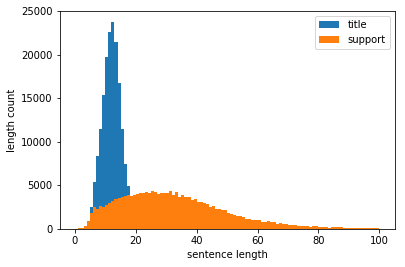

In [29]:
# inputs_hist = np.bincount(inputs_lengths)
# targets_hist = np.bincount(targets_lengths, minlength=100)
# print len(inputs_hist), len(targets_hist)

import matplotlib.pyplot as plt
%matplotlib inline
# plt.plot(inputs_hist)
# plt.plot(targets_hist)
plt.hist(inputs_lengths, 100, [0, 100])
plt.hist(targets_lengths, 100, [0, 100])
plt.legend(['title', 'support'])
plt.xlabel('sentence length')
plt.ylabel('length count')
plt.show()

In [27]:
print 'inputs_lengths, min = %d, max = %d, mean = %d, std = %f' %(
    inputs_lengths.min(), inputs_lengths.max(), 
    inputs_lengths.mean(), inputs_lengths.std())

print 'targets_lengths, min = %d, max = %d, mean = %d, std = %f' %(
    targets_lengths.min(), targets_lengths.max(),
    targets_lengths.mean(), targets_lengths.std())

inputs_lengths, min = 1, max = 72, mean = 11, std = 3.470013
targets_lengths, min = 1, max = 401, mean = 32, std = 19.708941


In [42]:
?np.log10

### 2. 统计词频的分布

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[75186, 133754, 169724, 181635, 231789, 233758, 458290, 1089816, 1299335, 4722510]
42459


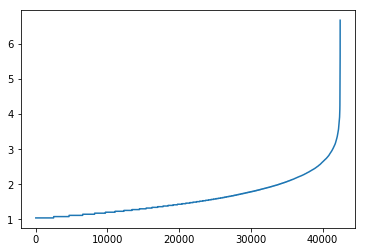

In [44]:
wordfreq = sorted([v for k, v in vocab.wordcount.iteritems() if v > 10])
print wordfreq[0:10]
print wordfreq[-10:]
print len(wordfreq)

plt.plot(np.log10(wordfreq))
plt.show()

In [54]:
sorted([3,2,1,5,2,13])

[1, 2, 2, 3, 5, 13]

In [59]:
# 从这里可以看出，还是有必要去除很多的字符，数字，停词等

highfreq = {k:v for k, v in vocab.wordcount.iteritems() if v > 2000}
highfreq = sorted(highfreq.iteritems(), key=lambda x: x[1], reverse=True) # 默认是升序
print len(highfreq)
for word, freq in highfreq:
    print word, freq

483
	4722510
1.0 1299335
0.0 1089816
， 458290
的 233758
2.0 231789

181635
  169724
3.0 133754
在 75186
“ 71921
” 68018
了 66079
、 63877
月 60102
日 58697
： 52201
4.0 51673
10 49977
5.0 42629
是 41797
《 37070
》 36925
和 33782
年 26905
中国 26426
将 26318
被 26024
6.0 25451
有 24411
7.0 23705
2016 23164
为 21829
- 21190
与 19517
人 18133
？ 17573
中 16889
上 15999
都 15473
！ 14999
不 14299
8.0 14110
你 13952
也 13639
就 13569
近日 13373
9.0 13196
对 13143
工作 13004
后 12725
— 12027
一 11934
, 11862
% 11824
新 11704
9 11666
等 11560
到 11394
发布 11170
1 11011
从 10992
消息 10882
个 10583
公司 10511
大 10217
北京 10078
一个 9968
会 9890
记者 9830
据 9746
发展 9700
我 9640
3 9531
报道 9509
: 9113
这 8902
并 8793
召开 8473
美国 8261
11.0 8255
10.0 8213
怎么 8156
举行 8120
什么 8034
2 8028
让 7941
岁 7909
时 7899
11 7827
他 7713
市场 7694
正式 7657
要 7441
于 7429
5 7349
4 7288
进行 7284
还 7199
7 7031
时间 6970
自己 6869
20 6854
世界 6837
男子 6793
已 6786
好 6707
活动 6698
6 6689
吗 6615
8 6604
来 6535
多 6451
全国 6445
国际 6433
国家 6376
12 6347
大家 6329
企业 6316
最 6246
我们 6185
以 6174
及 